# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Arturo Marín Navarro
- Nombre de alumno 2: Martín Gonzalez

### **Link de repositorio de GitHub:** `https://github.com/ArturoMarin9/Laboratorios-MDS7202-1`

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `mean absolute error` se registre como `"valid_mae"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_mae")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

Primero cargamos la base de datos:

In [14]:
import os
import optuna
import mlflow
import mlflow.xgboost
import xgboost as xgb
import pickle
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import shap

Revisamos si existen nulos:

In [15]:
data = pd.read_csv("water_potability.csv")
# Contar valores nulos por columna
nulos_por_columna = data.isnull().sum()

# Mostrar los resultados
print(nulos_por_columna)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Para que no haya valores nulos, eliminamos los valores nulos de la base de datos:

In [17]:
data = data.dropna()

In [18]:
# Contar valores nulos por columna
nulos_por_columna = data.isnull().sum()

# Mostrar los resultados
print(nulos_por_columna)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Como podemos ver, ya no hay valores nulos en la base de datos. Ahora continuaremos con lo pedido por el enunciado.

[I 2024-07-06 14:47:22,849] A new study created in memory with name: no-name-b2bbb14f-ac2d-417b-8a1f-a258cb419819
/Users/arturomarin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning:

[14:47:23] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

[I 2024-07-06 14:47:25,058] Trial 0 finished with value: 0.44737917841146363 and parameters: {'max_depth': 4, 'learning_rate': 0.034475315392922104, 'n_estimators': 103, 'subsample': 0.525067216708323, 'colsample_bytree': 0.6645957134163116}. Best is trial 0 with value: 0.44737917841146363.
/Users/arturomarin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning:

[14:47:25] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format w

Optimización completada. El mejor modelo ha sido guardado.


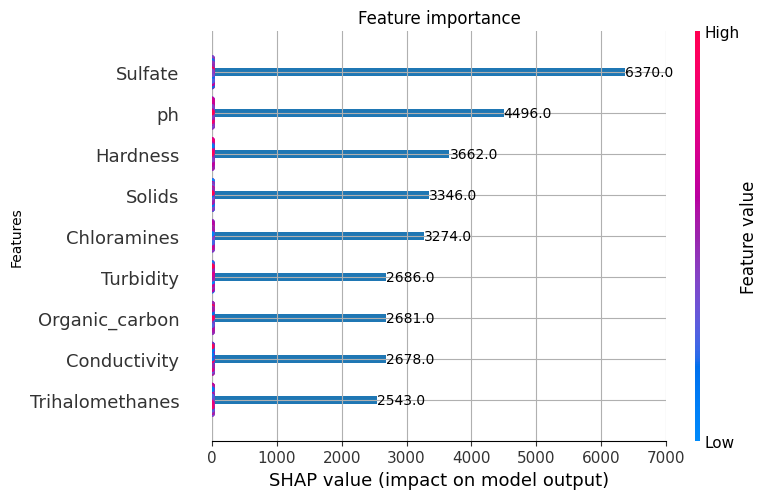

In [20]:
# Función para optimizar el modelo usando Optuna y registrar los resultados en MLFlow
def optimize_model(data, target):
    # Definir la función objetivo para Optuna
    def objective(trial):
        # Definir los hiperparámetros a optimizar
        params = {
            "objective": "reg:squarederror",
            "eval_metric": "mae",
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0)
        }

        # Dividir los datos en conjuntos de entrenamiento y validación
        X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, random_state=42)
        
        # Crear el modelo XGBoost
        model = xgb.XGBRegressor(**params)

        # Registrar el experimento en MLFlow
        experiment_name = "XGBoost Optimization"
        mlflow.set_experiment(experiment_name)
        
        # Iniciar una nueva corrida en MLFlow
        with mlflow.start_run(run_name=f"XGBoost con lr {params['learning_rate']}"):
            # Entrenar el modelo
            model.fit(X_train, y_train)

            # Realizar predicciones
            preds = model.predict(X_valid)

            # Calcular el error absoluto medio
            mae = mean_absolute_error(y_valid, preds)

            # Registrar los parámetros y métricas en MLFlow
            mlflow.log_params(params)
            mlflow.log_metric("valid_mae", mae)

            # Guardar el modelo
            mlflow.xgboost.log_model(model, "model")

            return mae

    # Crear un estudio de Optuna
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, timeout=300)  # Limitar el estudio a 5 minutos (300 segundos)

    # Guardar los gráficos de Optuna
    os.makedirs("plots", exist_ok=True)
    optuna.visualization.plot_optimization_history(study).write_image("plots/optimization_history.png")
    mlflow.log_artifact("plots/optimization_history.png", artifact_path="plots")

    # Obtener el mejor modelo
    best_model = get_best_model()
    
    # Guardar el modelo serializado
    os.makedirs("models", exist_ok=True)
    with open("models/best_model.pkl", "wb") as f:
        pickle.dump(best_model, f)
    mlflow.log_artifact("models/best_model.pkl", artifact_path="models")

    # Generar gráficos de importancia de las variables
    xgb.plot_importance(best_model)
    plt.savefig("plots/feature_importance.png")
    mlflow.log_artifact("plots/feature_importance.png", artifact_path="plots")

    # Explicar el modelo usando SHAP
    explainer = shap.Explainer(best_model)
    shap_values = explainer(data)
    shap.summary_plot(shap_values, data, show=False)
    plt.savefig("plots/shap_summary.png")
    mlflow.log_artifact("plots/shap_summary.png", artifact_path="plots")

    return best_model

# Guardar las versiones de las librerías utilizadas
def log_versions():
    mlflow.log_param("optuna_version", optuna.__version__)
    mlflow.log_param("mlflow_version", mlflow.__version__)
    mlflow.log_param("xgboost_version", xgb.__version__)

# Función para obtener el mejor modelo de un experimento específico
def get_best_model():
    runs = mlflow.search_runs()
    best_run = runs.loc[runs['metrics.valid_mae'].idxmin()]
    best_model = mlflow.xgboost.load_model(f"runs:/{best_run['run_id']}/model")

    return best_model

# Ejecución de la optimización al ejecutar optimize.py
if __name__ == "__main__":
    data = data
    target = data['Potability']  
    data = data.drop(columns=['Potability'])  

    # Llamar a la función optimize_model
    best_model = optimize_model(data, target)

    # Guardar las versiones de las librerías
    log_versions()

    print("Optimización completada. El mejor modelo ha sido guardado.")



# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

In [23]:
# ! pip install fastapi
# ! pip install uvicorn[standard]
# ! pip install pydantic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.2/391.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully 

In [1]:
import requests

# URL de la API FastAPI local
url = 'http://127.0.0.1:8000/potabilidad/'

# Datos para la solicitud POST
data = {
    "ph": 10.316400384553162,
    "Hardness": 217.2668424334475,
    "Solids": 10676.508475429378,
    "Chloramines": 3.445514571005745,
    "Sulfate": 397.7549459751925,
    "Conductivity": 492.20647361771086,
    "Organic_carbon": 12.812732207582542,
    "Trihalomethanes": 72.28192021570328,
    "Turbidity": 3.4073494284238364
}

# Realizar la solicitud POST
response = requests.post(url, json=data)

# Verificar el código de respuesta y el contenido de la respuesta
if response.status_code == 200:
    print("Respuesta recibida:")
    print(response.json())
else:
    print(f"Error en la solicitud: {response.status_code}, {response.text}")


Respuesta recibida:
{'potabilidad': 0}


Lo anterior se podría ver en: http://127.0.0.1:8000/docs#/

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?


**Archivo: requirements.txt**

```text
fastapi
uvicorn
pydantic
pandas
xgboost
```

---

**Archivo: Dockerfile**

```dockerfile
# Usa una imagen base de Python
FROM python:3.11

# Establece el directorio de trabajo en /app
WORKDIR /app

# Copia los archivos del proyecto al contenedor
COPY . .

# Instala las dependencias desde requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Expone el puerto 8000 en el contenedor
EXPOSE 8000

# Comando para ejecutar la aplicación FastAPI
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"]
```

---

**Archivo: .dockerignore**

```text
# .dockerignore
__pycache__
*.pyc
*.pyo
*.pyd
.env
.git
.gitignore
.vscode
```

---

### 1. Instrucciones para Construir y Ejecutar el Contenedor

**Descripción:**
Instrucciones para construir y ejecutar el contenedor Docker.

```markdown
Para construir el contenedor Docker, ejecutamos los comandos:

```sh
docker build -t proyecto_agua_app .
```

Para ejecutar el contenedor, usamos el comando:

```sh
docker run -d -p 8000:8000 -v /ruta/local:/app/data proyecto_agua_app
```

---

### 2. Configuración del Volumen

**Descripción:**
Para configurar un volumen en Docker para permitir la persistencia de los datos en una ruta local del computador.

```sh
# Crear y ejecutar el contenedor con un volumen
docker run -d -p 8000:8000 -v /ruta/local:/app/data proyecto_agua_app
```

---

### 3. Exponer el Puerto

**Descripción:**
El contenedor expone el puerto 8000 para acceder a la API sin tener que entrar al contenedor directamente.

```sh
# El comando anterior ya expone el puerto 8000
docker run -d -p 8000:8000 -v /ruta/local:/app/data proyecto_agua_app
```

---

### 4. Imágenes de la Ejecución del Contenedor

**Descripción:**
Incluir imágenes que muestren la ejecución del contenedor y los resultados obtenidos.

```markdown
**Ejecución del Contenedor:**

![Ejecución del Contenedor](ruta/a/tu/imagen1.png)

**Resultados Obtenidos:**

![Resultados Obtenidos](ruta/a/tu/imagen2.png)
```

---

### 6. Análisis de Recursos Utilizados

**Descripción:**
Revisar y comentar los recursos utilizados por el contenedor. Analizar si los contenedores son livianos en términos de recursos.

```markdown
**Análisis de Recursos:**

Después de ejecutar el contenedor, utilizamos el siguiente comando para revisar los recursos utilizados:

```sh
docker stats proyecto_agua_app
```

### *¿Cómo se diferencia Docker de una máquina virtual (VM)?*

Docker y las máquinas virtuales (VM) se utilizan para crear entornos de ejecución aislados, pero difieren significativamente en su arquitectura y funcionamiento. Docker utiliza contenedores que comparten el mismo sistema operativo del host, lo que permite ejecutar múltiples aplicaciones en contenedores ligeros y eficientes sin necesidad de incluir un sistema operativo completo en cada uno. Por otro lado, las VM incluyen un sistema operativo completo junto con aplicaciones y sus dependencias, ejecutándose sobre un hipervisor que virtualiza el hardware del host. Esto hace que las VM sean más pesadas y requieran más recursos y tiempo de arranque en comparación con los contenedores de Docker, que son más rápidos y eficientes. En términos de aislamiento, Docker proporciona un nivel de aislamiento a nivel de procesos, compartiendo el núcleo del sistema operativo, mientras que las VM ofrecen un aislamiento completo a nivel de hardware.

### *¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?*

Usar Docker para ejecutar aplicaciones en contenedores ofrece varios beneficios en comparación con ejecutarlas directamente en el sistema local. Docker ejecuta la aplicación en un contenedor aislado, lo que significa que todas las dependencias y configuraciones están encapsuladas dentro del contenedor. Esto evita conflictos con otras aplicaciones o servicios en el sistema local, proporcionando un entorno de ejecución limpio y consistente. Además, Docker garantiza que la aplicación se ejecutará de la misma manera en cualquier entorno, ya sea desarrollo, prueba o producción, lo que elimina problemas relacionados con la compatibilidad y las configuraciones específicas del entorno local. En cambio, ejecutar una aplicación directamente en el sistema local puede causar conflictos con otras aplicaciones debido a dependencias y configuraciones compartidas, y no garantiza la consistencia entre diferentes entornos.

### *¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?*

Docker asegura la consistencia entre diferentes entornos de desarrollo y producción mediante el uso de contenedores. Cada contenedor encapsula todas las dependencias y configuraciones necesarias para ejecutar una aplicación, lo que significa que se ejecutará de la misma manera independientemente del entorno en el que se despliegue. Esto elimina problemas de "funciona en mi máquina" al garantizar que la misma imagen de contenedor utilizada en el entorno de desarrollo se pueda usar en los entornos de prueba y producción sin cambios. Además, Docker permite definir la configuración del entorno en archivos de configuración (Dockerfile y docker-compose.yml), lo que facilita la replicación y el despliegue consistente de aplicaciones en diferentes entornos.

### *¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?*

Los volúmenes en Docker se utilizan para gestionar la persistencia de datos, permitiendo que los datos almacenados en un contenedor persistan incluso después de que el contenedor se haya detenido o eliminado. Los volúmenes se crean y gestionan de forma independiente de los contenedores, lo que permite compartir datos entre múltiples contenedores y garantizar que los datos no se pierdan cuando se actualizan o se eliminan los contenedores. Los volúmenes se pueden montar en puntos específicos del sistema de archivos del contenedor, proporcionando un almacenamiento persistente y consistente para las aplicaciones. Docker también permite la creación de volúmenes gestionados por el host o por un controlador de almacenamiento externo, proporcionando flexibilidad en la gestión del almacenamiento de datos.

### *¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?*

El Dockerfile y el archivo docker-compose.yml son componentes esenciales para la configuración y despliegue de aplicaciones en Docker. Un Dockerfile es un archivo de texto que contiene una serie de instrucciones para construir una imagen de Docker. Estas instrucciones definen la base de la imagen, las dependencias necesarias, las configuraciones del entorno y los comandos para ejecutar la aplicación. Un archivo docker-compose.yml, por otro lado, es un archivo de configuración YAML que define y orquesta múltiples servicios de Docker. Permite definir cómo deben interactuar varios contenedores, sus redes y volúmenes, facilitando el despliegue y la gestión de aplicaciones multi-contenedor. Juntos, estos archivos permiten la creación y despliegue de entornos de aplicación consistentes y reproducibles, simplificando la gestión de configuraciones complejas.

---

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>